In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import pickle

In [2]:
x_train_side=np.loadtxt("../train_test_set/x_side_train.txt")
x_test_side= np.loadtxt("../train_test_set/x_side_test.txt")
with open("../train_test_set/y_side_train.txt", "r") as fp:
    y_train_side = [x[:-1] for x in fp.readlines()]
with open("../train_test_set/y_side_test.txt", "r") as fp:
    y_test_side = [x[:-1] for x in fp.readlines()]

In [3]:
x_test_front=np.loadtxt("../train_test_set/x_features_test.txt")
x_train_front=np.loadtxt("../train_test_set/x_features_train.txt")
with open("../train_test_set/y_labels_test.txt", "r") as fp:
    y_test_front = [x[:-1] for x in fp.readlines()]
with open("../train_test_set/y_labels_train.txt", "r") as fp:
    y_train_front = [x[:-1] for x in fp.readlines()]

In [4]:
x_train_front.shape

(2174, 50)

In [5]:
x_train_side.shape

(601, 50)

In [6]:
x_train=np.concatenate((x_train_front, x_train_side), axis=0)

In [7]:
x_train.shape

(2775, 50)

In [8]:
x_test=np.concatenate((x_test_front, x_test_side), axis=0)

In [9]:
x_test.shape

(1638, 50)

In [10]:
y_train=[]
for i in range(x_train_front.shape[0]):
    y_train.append('front')
for i in range(x_train_side.shape[0]):
    y_train.append('side')

In [11]:
len(y_train)

2775

In [12]:
y_test=[]
for i in range(x_test_front.shape[0]):
    y_test.append('front')
for i in range(x_test_side.shape[0]):
    y_test.append('side')

In [13]:
y_test[-400:-300]

['front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'front',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side',
 'side']

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0).fit(x_train, y_train)
log_reg.score(x_test, y_test)

0.9688644688644689

Normalized confusion matrix
[[0.96476116 0.03523884]
 [0.0166205  0.9833795 ]]


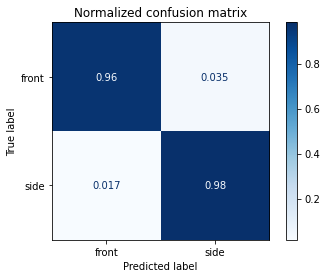

In [16]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
# Plot non-normalized confusion matrix
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(log_reg, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
#plt.show()
plt.savefig('../figures/confusion_matrix_side_randomFor.png')

In [28]:
# save the model to disk
filename = 'front_or_side_model.sav'
pickle.dump(log_reg, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9688644688644689


In [20]:
log_reg.coef_

array([[ 1.55358554, -0.61453918,  1.05601273,  0.58114868,  1.41227264,
        -1.16643118, -3.55716424, -6.08422638, -0.51683992, -0.08348854,
         1.17654042,  0.7062271 , -0.77079691, -1.5652987 , -0.59009765,
         0.69459056, -2.36037896, -0.07032357, -3.2231467 , -1.64778754,
        -1.46926725, -0.69980853,  1.03572081,  0.64589972,  0.04108137,
         1.99977205,  2.08977622,  2.09451181, -0.1683698 , -0.87686901,
         2.14019583,  0.7106103 ,  0.56266857,  1.03341632,  1.15690727,
        -0.67928637,  0.158658  ,  1.28419164, -0.47107929,  0.50001618,
        -1.29368514, -0.76513731, -2.13486422, -1.19160135, -0.13310383,
         0.10377495, -0.28508435, -0.85835419, -1.87163895, -0.82068922]])